In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
a=pd.read_csv("Cancer_data.csv")
print(a)

      Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
0      58       1  16.085313        0            1          8.146251   
1      71       0  30.828784        0            1          9.361630   
2      48       1  38.785084        0            2          5.135179   
3      34       0  30.040296        0            0          9.502792   
4      62       1  35.479721        0            0          5.356890   
...   ...     ...        ...      ...          ...               ...   
1495   62       1  25.090025        0            0          9.892167   
1496   31       0  33.447125        0            1          1.668297   
1497   63       1  32.613861        1            1          0.466848   
1498   55       0  25.568216        0            0          7.795317   
1499   67       1  23.663104        0            0          2.525860   

      AlcoholIntake  CancerHistory  Diagnosis  
0          4.148219              1          1  
1          3.519683              0     

In [4]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [6]:
x=a.iloc[:, [0,1,2,3,4,5,6,7]]
y=a.iloc[:,8]
print(x)


      Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
0      58       1  16.085313        0            1          8.146251   
1      71       0  30.828784        0            1          9.361630   
2      48       1  38.785084        0            2          5.135179   
3      34       0  30.040296        0            0          9.502792   
4      62       1  35.479721        0            0          5.356890   
...   ...     ...        ...      ...          ...               ...   
1495   62       1  25.090025        0            0          9.892167   
1496   31       0  33.447125        0            1          1.668297   
1497   63       1  32.613861        1            1          0.466848   
1498   55       0  25.568216        0            0          7.795317   
1499   67       1  23.663104        0            0          2.525860   

      AlcoholIntake  CancerHistory  
0          4.148219              1  
1          3.519683              0  
2          4.728368     

In [7]:
print(y)

0       1
1       0
2       1
3       0
4       1
       ..
1495    1
1496    1
1497    1
1498    1
1499    0
Name: Diagnosis, Length: 1500, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier
base_estimator=DecisionTreeClassifier(max_depth=1)

In [10]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
model.fit(x_train, y_train)

,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [11]:
y_pred=model.predict(x_test)
print(y_pred)

[1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1
 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1
 0 0 0 0]


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(accuracy)
print(conf_matrix)
print(report)

0.9466666666666667
[[182   2]
 [ 14 102]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       184
           1       0.98      0.88      0.93       116

    accuracy                           0.95       300
   macro avg       0.95      0.93      0.94       300
weighted avg       0.95      0.95      0.95       300



In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - AdaBoost")
plt.show()


NameError: name 'conf_matrix' is not defined

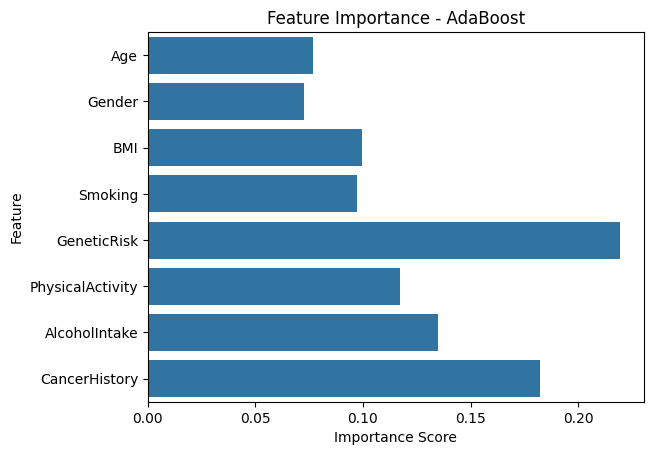

In [14]:
sns.barplot(x=model.feature_importances_, y=x.columns)
plt.title("Feature Importance - AdaBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [1]:
plt.scatter(x_train[:, 3], y_train, color='red')
sorted_indices = x_train[:, 3].argsort()
plt.plot(x_train[sorted_indices, 3], m.predict(x_train)[sorted_indices], color='blue')
plt.title("cancer data")
plt.xlabel("radius")
plt.ylabel("diagnous")
plt.show()


NameError: name 'plt' is not defined